In [1]:
#Imports
import os 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

import matplotlib.pyplot as plt
import scipy.spatial as spa
import scipy.optimize as spo
from tqdm import tqdm_notebook

import pint

import support as sp

%matplotlib inline

idx = pd.IndexSlice

%load_ext autoreload
%autoreload 2

In [2]:
file = "KZ_data_20190912"
kzd = pd.read_csv(file, sep = "\t", index_col = [0,1])
kzd["defect_density"] = kzd.dom/50
kzd["vel"] = (-kzd.r+34.675)/kzd.time #34.675 is the initial radius
kzd["inv_time"] = 1/kzd.time
kzd.head()

dom  dom_length          r  time  defect_density       vel  \
test test_num                                                               
1.0  0.0       6.0    8.333333  31.204325  30.0            0.12  0.115689   
     1.0       4.0   12.500000  31.215399  30.0            0.08  0.115320   
     2.0       4.0   12.500000  31.202786  30.0            0.08  0.115740   
     3.0       4.0   12.500000  31.223551  30.0            0.08  0.115048   
     4.0       4.0   12.500000  31.211420  30.0            0.08  0.115453   

               inv_time  
test test_num            
1.0  0.0       0.033333  
     1.0       0.033333  
     2.0       0.033333  
     3.0       0.033333  
     4.0       0.033333

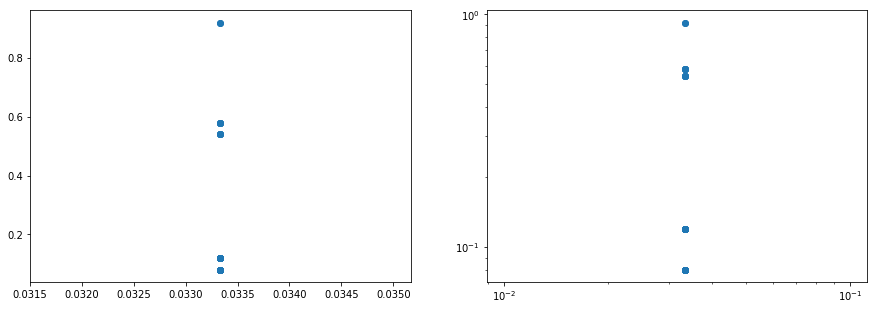

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kzd.loc[idx[1,:],"inv_time"], kzd.loc[idx[1,:], "defect_density"],'o')
ax[1].loglog(kzd.loc[idx[1,:],"inv_time"], kzd.loc[idx[1,:], "defect_density"],'o')

In [34]:
kzd.loc[idx[1,:],"defect_density"][kzd.loc[idx[1,:], "defect_density"]>0.15]

test  test_num
1.0   15.0        0.58
      17.0        0.92
      18.0        0.92
      19.0        0.54
      20.0        0.54
      26.0        0.54
      29.0        0.58
      30.0        0.58
      31.0        0.58
      42.0        0.58
      43.0        0.54
      55.0        0.54
Name: defect_density, dtype: float64

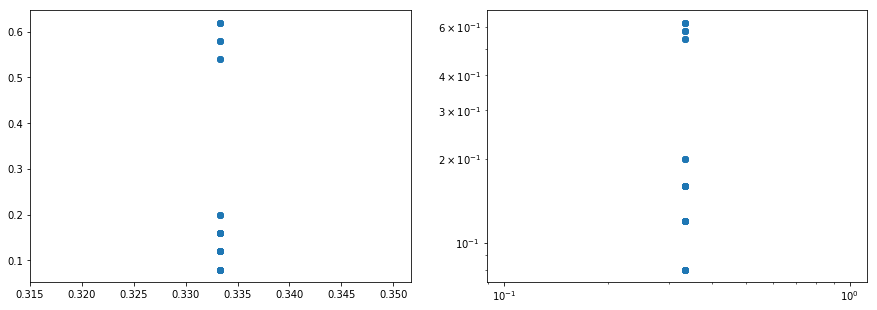

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kzd.loc[idx[7,:],"inv_time"], kzd.loc[idx[7,:], "defect_density"],'o')
ax[1].loglog(kzd.loc[idx[7,:],"inv_time"], kzd.loc[idx[7,:], "defect_density"],'o')

In [27]:
kzd.loc[idx[7,:],"defect_density"][kzd.loc[idx[7,:], "defect_density"]<0.4].count()

48

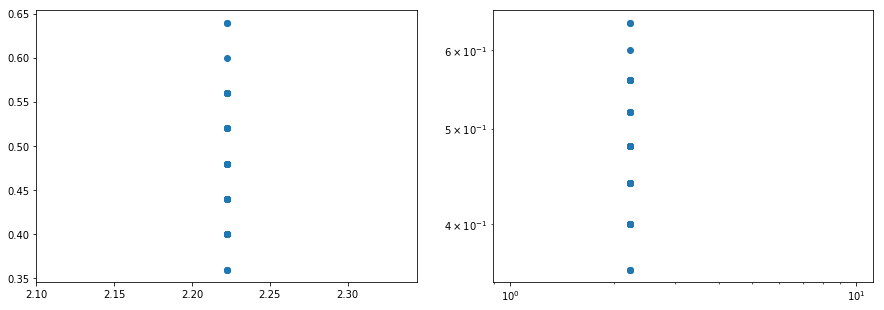

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kzd.loc[idx[15,:],"inv_time"], kzd.loc[idx[15,:], "defect_density"],'o')
ax[1].loglog(kzd.loc[idx[15,:],"inv_time"], kzd.loc[idx[15,:], "defect_density"],'o')

In [30]:
kzd.loc[idx[15,:],"defect_density"][kzd.loc[idx[15,:], "defect_density"]>0.5].count()

15